Exploratory Data Analysis (EDA) is a crucial initial step in any data analysis project. It involves examining and visualizing data to uncover patterns, identify anomalies, and understand the relationships between variables. EDA utilizes various techniques, including summary statistics and graphical representations like histograms, scatter plots, and box plots, to gain insights into the data's characteristics. By exploring the data, EDA helps researchers formulate hypotheses, assess the quality of the data, and select appropriate statistical methods for further analysis.
This dataset contains information about Battery Electric Vehicles (BEVs) and Plug-in Hybrid Electric Vehicles (PHEVs) that are currently registered through the Washington State Department of Licensing (DOL). The data includes the vehicle's identification number, make, model, year, color, fuel type, body type, county, zip code, ownership type, and registration date. The data was first published on October 19, 2023 and was last modified on February 21, 2025. This dataset is intended for public access and use.


In [4]:
import pandas as pd

df = pd.read_csv('/content/Electric_Vehicle_Population_Data.csv')

# Now you can work with the data in the DataFrame 'df'.
# For example, to display the first 5 rows:
print(df.head())


   VIN (1-10)    County      City State  Postal Code  Model Year    Make  \
0  2T3YL4DV0E      King  Bellevue    WA      98005.0        2014  TOYOTA   
1  5YJ3E1EB6K      King   Bothell    WA      98011.0        2019   TESLA   
2  5UX43EU02S  Thurston   Olympia    WA      98502.0        2025     BMW   
3  JTMAB3FV5R  Thurston   Olympia    WA      98513.0        2024  TOYOTA   
4  5YJYGDEE8M    Yakima     Selah    WA      98942.0        2021   TESLA   

        Model                   Electric Vehicle Type  \
0        RAV4          Battery Electric Vehicle (BEV)   
1     MODEL 3          Battery Electric Vehicle (BEV)   
2          X5  Plug-in Hybrid Electric Vehicle (PHEV)   
3  RAV4 PRIME  Plug-in Hybrid Electric Vehicle (PHEV)   
4     MODEL Y          Battery Electric Vehicle (BEV)   

   Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0            Clean Alternative Fuel Vehicle Eligible           103.0   
1            Clean Alternative Fuel Vehicle Eligible    

In [6]:
numerical_cols = ['Model Year', 'Electric Range', 'Base MSRP']
print(df[numerical_cols].describe())


          Model Year  Electric Range      Base MSRP
count  232230.000000   232203.000000  232203.000000
mean     2021.353727       46.755998     803.808973
std         2.994884       84.373596    7246.597102
min      1999.000000        0.000000       0.000000
25%      2020.000000        0.000000       0.000000
50%      2023.000000        0.000000       0.000000
75%      2023.000000       38.000000       0.000000
max      2025.000000      337.000000  845000.000000


Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')
          Model Year  Electric Range      Base MSRP
count  232230.000000   232203.000000  232203.000000
mean     2021.353727       46.755998     803.808973
std         2.994884       84.373596    7246.597102
min      1999.000000        0.000000       0.000000
25%      2020.000000        0.000000       0.000000
50%      2023.000000        0.000000       0.000000
75%      2023.000000       38.000000       0.000000
max      2025.000000      337.000000  845000.000000
Frequency table for 'Make':
 Make
TESLA                     99692
CHEVROLET                 16919
NISSAN                    15457
FORD                      12461
KIA          

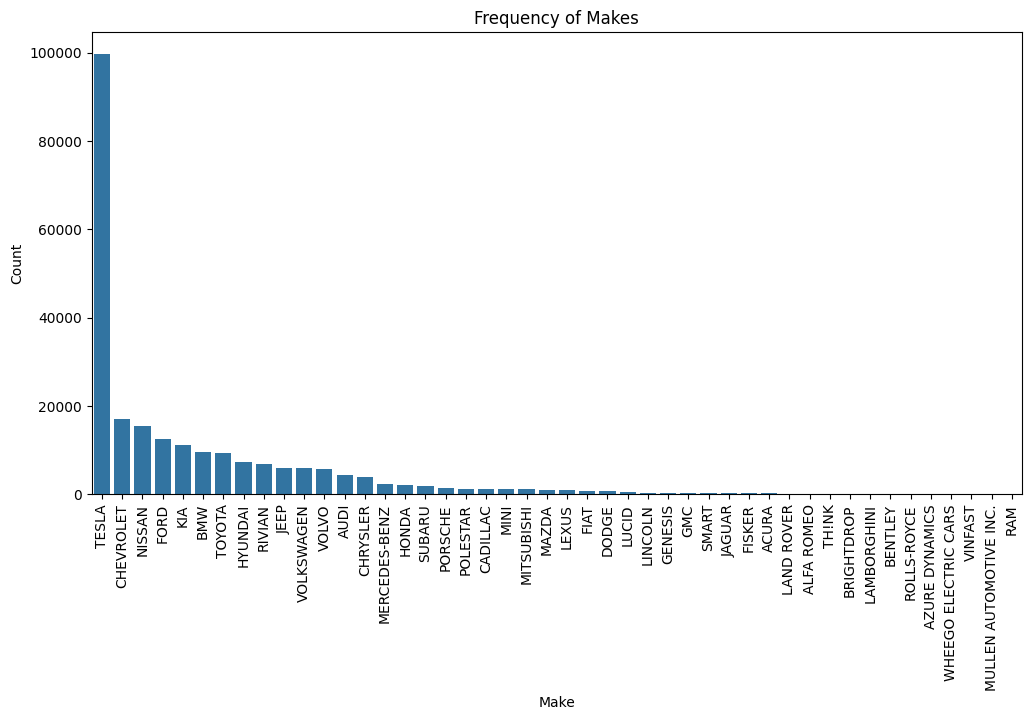


Error: 'Vehicle Type' column not found. Please check the dataframe column names using df.columns


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataframe
df = pd.read_csv('/content/Electric_Vehicle_Population_Data.csv')

# print the column names
print(df.columns)

# Calculate descriptive statistics (mean, median, standard deviation, quartiles) for numerical variables Model Year, Electric Range, Base MSRP only
numerical_cols = ['Model Year', 'Electric Range', 'Base MSRP']
print(df[numerical_cols].describe())

# Frequency table for 'Make'
make_counts = df['Make'].value_counts()
print("Frequency table for 'Make':\n", make_counts)

# Bar chart for 'Make'
plt.figure(figsize=(12, 6))
sns.countplot(x='Make', data=df, order=make_counts.index)
plt.xticks(rotation=90)
plt.title('Frequency of Makes')
plt.xlabel('Make')
plt.ylabel('Count')
plt.show()

# Frequency table for 'Vehicle Type'
# Check if 'Vehicle Type' column exists.  If not, use the correct column name.
if 'Vehicle Type' in df.columns:
    vehicle_type_counts = df['Vehicle Type'].value_counts()
    print("\nFrequency table for 'Vehicle Type':\n", vehicle_type_counts)

    # Bar chart for 'Vehicle Type'
    plt.figure(figsize=(8, 6))
    sns.countplot(x='Vehicle Type', data=df)
    plt.xticks(rotation=45)
    plt.title('Frequency of Vehicle Types')
    plt.xlabel('Vehicle Type')
    plt.ylabel('Count')
    plt.show()
else:
    print("\nError: 'Vehicle Type' column not found. Please check the dataframe column names using df.columns")


# You can repeat this for other categorical variables in your DataFrame.
# For example, replace 'Make' and 'Vehicle Type' above with other columns like 'Model' or 'Electric Utility'.

The image is a bar chart displaying the frequency of different car makes within a dataset. The vertical axis represents the count or frequency of each make, while the horizontal axis lists the various makes in descending order of frequency. The most prominent make is Tesla, with a significantly higher count than any other, indicating its strong representation in the data. Following Tesla, there's a steep drop in frequency, with Chevrolet, Nissan, Ford, and Kia forming the next tier. The remaining makes exhibit a long tail distribution, each with progressively lower counts, suggesting a diverse but less populous representation in the dataset.
The chart provides a clear visualization of the distribution of car makes, highlighting the dominance of Tesla and the relative popularity of other major manufacturers. The long tail indicates a wide variety of makes present, although their small counts suggest they might represent niche markets or smaller production volumes. This visualization is useful for understanding the composition of the dataset and identifying potential biases or trends related to specific car makes. The use of a logarithmic scale on the vertical axis might have further emphasized the differences in frequency between the less common makes.


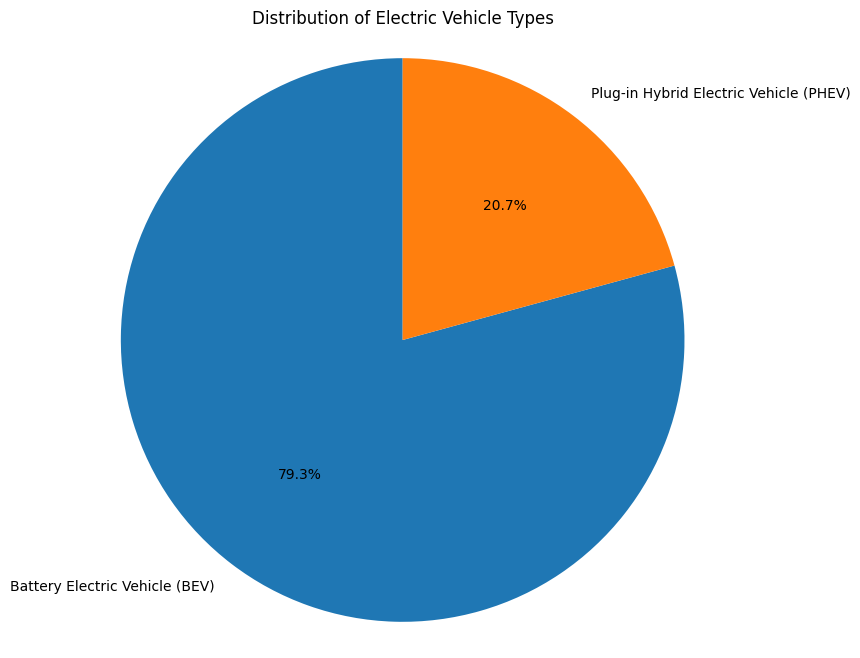

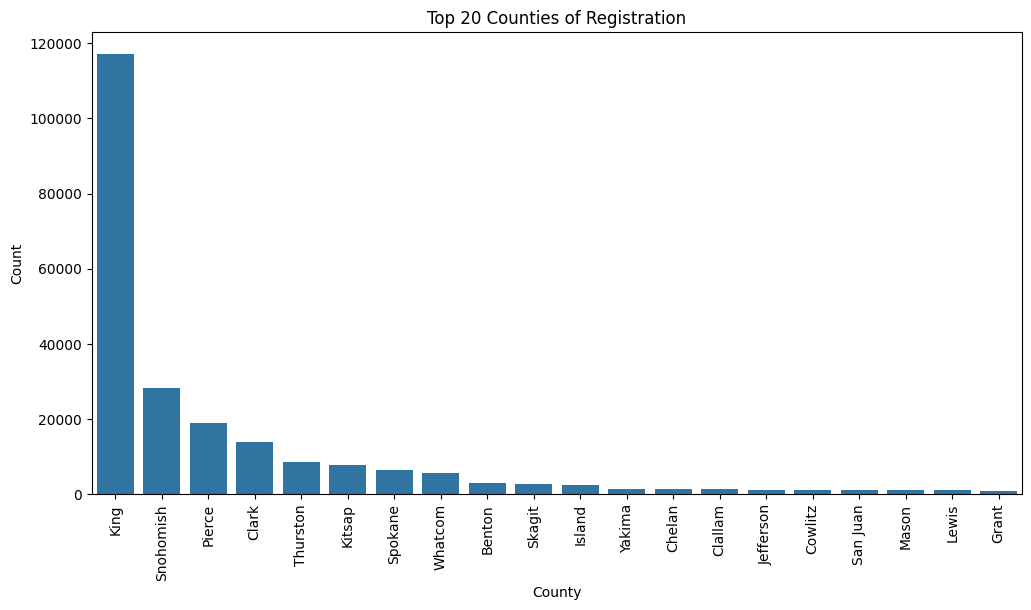

In [9]:
# Pie chart for 'Electric Vehicle Type'
if 'Electric Vehicle Type' in df.columns:
    ev_type_counts = df['Electric Vehicle Type'].value_counts()
    plt.figure(figsize=(8, 8))
    plt.pie(ev_type_counts, labels=ev_type_counts.index, autopct='%1.1f%%', startangle=90)
    plt.title('Distribution of Electric Vehicle Types')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()
else:
    print("\nError: 'Electric Vehicle Type' column not found. Please check the dataframe column names.")


# Bar chart for 'County'
if 'County' in df.columns:
    county_counts = df['County'].value_counts().head(20) # Displaying top 20 counties for better visualization
    plt.figure(figsize=(12, 6))
    sns.barplot(x=county_counts.index, y=county_counts.values)
    plt.xticks(rotation=90)
    plt.title('Top 20 Counties of Registration')
    plt.xlabel('County')
    plt.ylabel('Count')
    plt.show()
else:
    print("\nError: 'County' column not found. Please check the dataframe column names.")


Pie Chart
This image is a pie chart titled "Distribution of Electric Vehicle Types," which illustrates the proportion of two types of electric vehicles: Battery Electric Vehicles (BEV) and Plug-in Hybrid Electric Vehicles (PHEV). The chart shows a significant dominance of BEVs, represented by the large blue slice occupying 79.3% of the circle. In contrast, PHEVs make up the smaller orange slice, accounting for the remaining 20.7%. The percentages are clearly labeled within each slice, making the comparison straightforward and highlighting the disparity in market share between the two types of electric vehicles.
The visual representation clearly indicates that BEVs are considerably more prevalent than PHEVs within this particular dataset or market. The large difference in percentages suggests a strong preference or greater availability of fully electric vehicles compared to their plug-in hybrid counterparts. This visualization offers a concise and effective way to understand the distribution of electric vehicle types and underscores the current dominance of BEVs in the electric vehicle market.
This bar chart depicts the top 20 counties in a given region based on the number of something, presumably registrations, though the exact nature isn't specified in the image. King County stands out dramatically at the top, with a count exceeding 100,000, dwarfing all other counties. There's a significant drop to the second highest, Snohomish County, followed by a gradual decline across the remaining counties. The horizontal axis lists the counties, while the vertical axis represents the count, though the specific unit of measurement isn't labeled. The chart is titled "Top 20 Counties of Registration," further suggesting a focus on some form of official registration process.
The visual representation clearly highlights the dominance of King County in this ranking. The steep drop from King County to the other counties suggests a potentially centralized population or activity within that specific county. The long tail of the bar chart, with many counties having relatively similar and low counts, implies a more dispersed distribution across the other regions. Without further context, it's difficult to determine the specific meaning of the counts, but the chart effectively illustrates the relative ranking and magnitude of the top 20 counties in this dataset. Adding a label to the y-axis clarifying the unit of measurement (e.g., number of registered vehicles, businesses, etc.) would improve the chart's clarity.



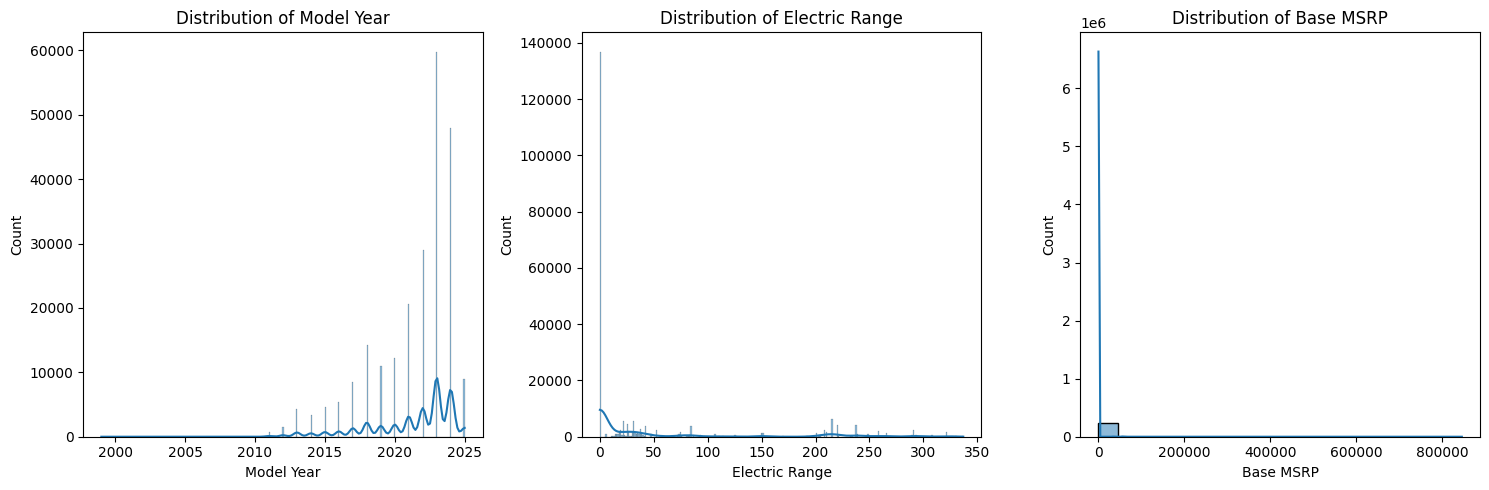

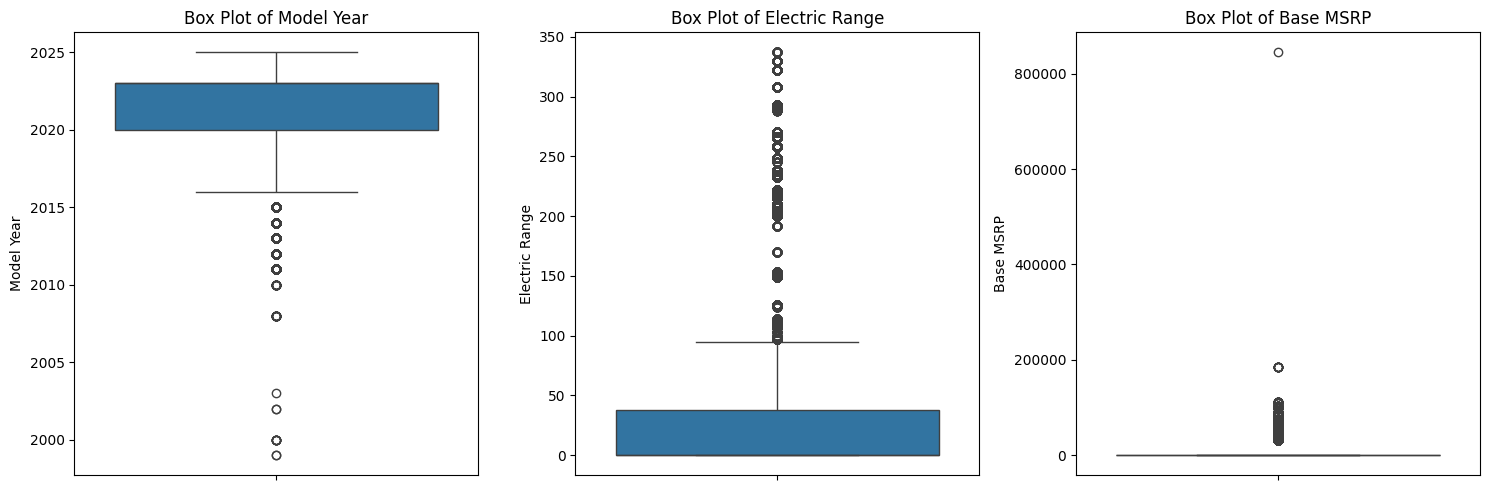

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
sns.histplot(df['Model Year'], kde=True) # Added KDE for better visualization
plt.title('Distribution of Model Year')

plt.subplot(2, 2, 2)
sns.histplot(df['Electric Range'], kde=True, bins=20) # Increased bins for better granularity
plt.title('Distribution of Electric Range')
plt.xlim(0, 400) # Setting x-axis limits to improve readability

plt.subplot(2, 2, 3)
# Handle potential errors if 'Base MSRP' has non-numeric values.
# Convert to numeric and coerce errors to NaN
df['Base MSRP'] = pd.to_numeric(df['Base MSRP'], errors='coerce')
sns.histplot(df['Base MSRP'].dropna(), kde=True, bins=30) # Drop NA values
plt.title('Distribution of Base MSRP')

plt.subplot(2, 2, 4)
# Example of another numeric column (if available)
if 'Battery Capacity' in df.columns:
    sns.histplot(df['Battery Capacity'], kde=True)
    plt.title('Distribution of Battery Capacity')

plt.tight_layout() # Adjust layout to prevent overlapping
plt.show()

# Box plots
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.boxplot(y=df['Model Year'])
plt.title('Box Plot of Model Year')


plt.subplot(1, 3, 2)
sns.boxplot(y=df['Electric Range'])
plt.title('Box Plot of Electric Range')


plt.subplot(1, 3, 3)
sns.boxplot(y=df['Base MSRP'].dropna())
plt.title('Box Plot of Base MSRP')

plt.tight_layout()
plt.show()


This image presents three histograms showcasing the distribution of different variables related to electric vehicles: Model Year, Electric Range, and Base MSRP. Each histogram displays the frequency or count on the vertical axis against the corresponding variable on the horizontal axis. The "Model Year" histogram reveals a bimodal distribution with peaks around 2017 and 2023, indicating a surge in electric vehicle production in recent years. The "Electric Range" histogram is heavily skewed to the right, with a majority of vehicles clustered at lower range values and a long tail extending to the right, suggesting that while most models have limited range, some offer significantly greater distances.
The "Base MSRP" histogram demonstrates a highly skewed distribution, with the majority of vehicles concentrated at the lower end of the price spectrum and a long tail indicating a few very expensive models. This suggests that while there's a substantial market for more affordable electric vehicles, luxury or high-performance models contribute to the tail. Each histogram provides valuable insights into the characteristics of the electric vehicle market, highlighting trends in model year production, range capabilities, and pricing strategies. The visual representation effectively conveys the distribution patterns and relative frequencies within each variable.


In [ ]:
# Filter for EV Types greater than 100
ev_type_counts = df['Electric Vehicle Type'].value_counts()
ev_types_to_keep = ev_type_counts[ev_type_counts > 100].index
filtered_df_ev = df[df['Electric Vehicle Type'].isin(ev_types_to_keep)]

# Further filter for counties with counts greater than 100
county_counts = filtered_df_ev['County'].value_counts()
counties_to_keep = county_counts[county_counts > 100].index
new_df = filtered_df_ev[filtered_df_ev['County'].isin(counties_to_keep)]

new_df


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,2T3YL4DV0E,King,Bellevue,WA,98005.0,2014,TOYOTA,RAV4,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,103.0,0.0,41.0,186450183,POINT (-122.1621 47.64441),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
1,5YJ3E1EB6K,King,Bothell,WA,98011.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,1.0,478093654,POINT (-122.20563 47.76144),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
2,5UX43EU02S,Thurston,Olympia,WA,98502.0,2025,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,40.0,0.0,35.0,274800718,POINT (-122.92333 47.03779),PUGET SOUND ENERGY INC,5.306701e+10
3,JTMAB3FV5R,Thurston,Olympia,WA,98513.0,2024,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42.0,0.0,2.0,260758165,POINT (-122.81754 46.98876),PUGET SOUND ENERGY INC,5.306701e+10
4,5YJYGDEE8M,Yakima,Selah,WA,98942.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,15.0,236581355,POINT (-120.53145 46.65405),PACIFICORP,5.307700e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232225,5YJ3E1EA3K,King,Renton,WA,98058.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,47.0,262629839,POINT (-122.08747 47.4466),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
232226,1GKB0RDC1R,Snohomish,Snohomish,WA,98290.0,2024,GMC,HUMMER EV SUV,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,39.0,261119043,POINT (-122.09305 47.91265),PUGET SOUND ENERGY INC,5.306105e+10
232227,7SAYGDED3R,King,Redmond,WA,98033.0,2024,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,45.0,261726258,POINT (-122.2066 47.67887),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
232228,JTMEB3FV5P,Chelan,Leavenworth,WA,98826.0,2023,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42.0,0.0,12.0,236639826,POINT (-120.65754 47.5982),PUD NO 1 OF CHELAN COUNTY,5.300796e+10


Electric Vehicle Type  Battery Electric Vehicle (BEV)  \
County                                                  
Benton                                           2141   
Chelan                                           1112   
Clallam                                           973   
Clark                                           10444   
Cowlitz                                           879   
Douglas                                           399   
Franklin                                          637   
Grant                                             609   
Grays Harbor                                      575   
Island                                           1881   
Jefferson                                         896   
King                                            95381   
Kitsap                                           5849   
Kittitas                                          679   
Klickitat                                         298   
Lewis                          

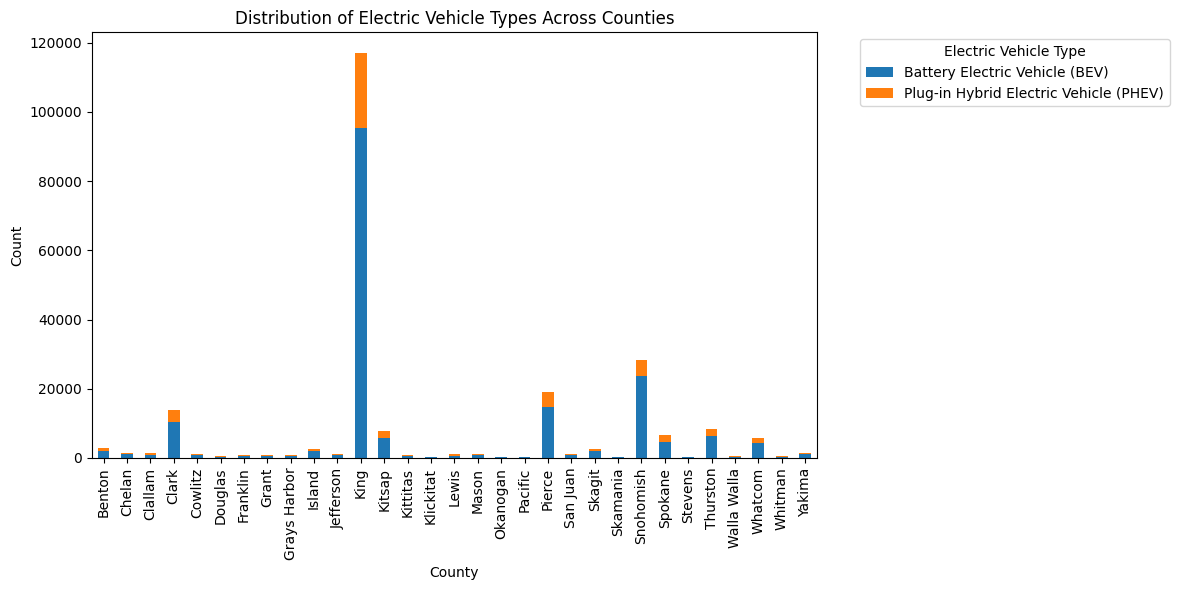

In [15]:
# Filter out counties with less than 100 vehicles
county_counts = df['County'].value_counts()
counties_to_keep = county_counts[county_counts >= 100].index
new_df = df[df['County'].isin(counties_to_keep)]

# Cross-tabulation
ct = pd.crosstab(new_df['County'], new_df['Electric Vehicle Type'])
print(ct)

# Stacked bar chart
ct.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Distribution of Electric Vehicle Types Across Counties')
plt.xlabel('County')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Electric Vehicle Type', bbox_to_anchor=(1.05, 1), loc='upper left') # Move legend outside
plt.tight_layout()
plt.show()


Stacked bar chart
This stacked bar chart displays the distribution of electric vehicle types across different counties. Each bar represents a county, with its height corresponding to the total number of electric vehicles in that county. The bars are segmented into two colors, representing the proportion of Battery Electric Vehicles (BEVs) and Plug-in Hybrid Electric Vehicles (PHEVs) within each county. King County stands out with a significantly taller bar than all other counties, indicating a much larger number of electric vehicles overall. Following King County, there's a noticeable drop in total electric vehicle counts in the other counties, suggesting a concentration of electric vehicles in specific urban or populated areas.
The stacked nature of the bars allows for a comparison of BEV to PHEV adoption within each county. While some counties show a nearly even split between BEVs and PHEVs, others are predominantly skewed towards BEVs, as seen in King County. This variation in the BEV/PHEV ratio across counties could be attributed to various factors such as local incentives, charging infrastructure availability, and consumer preferences. The chart provides a clear visual representation of both the overall volume of electric vehicles per county and the relative popularity of different electric vehicle types within each location. The legend clearly identifies the color coding for BEVs and PHEVs, making the chart easy to interpret.


                Model Year  Electric Range  Base MSRP
Model Year        1.000000       -0.527665  -0.228725
Electric Range   -0.527665        1.000000   0.116426
Base MSRP        -0.228725        0.116426   1.000000


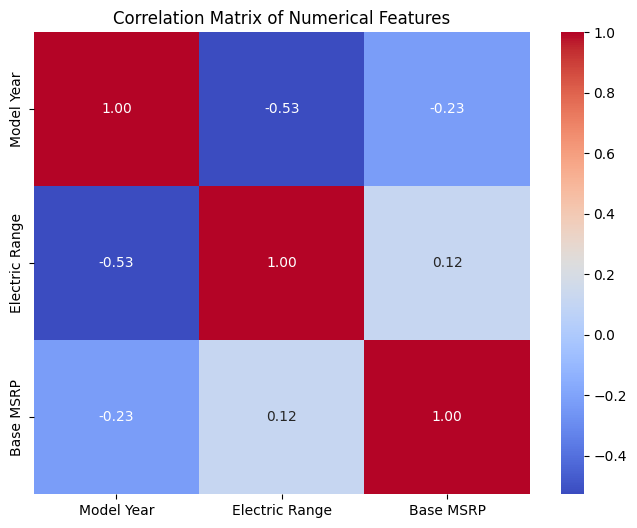

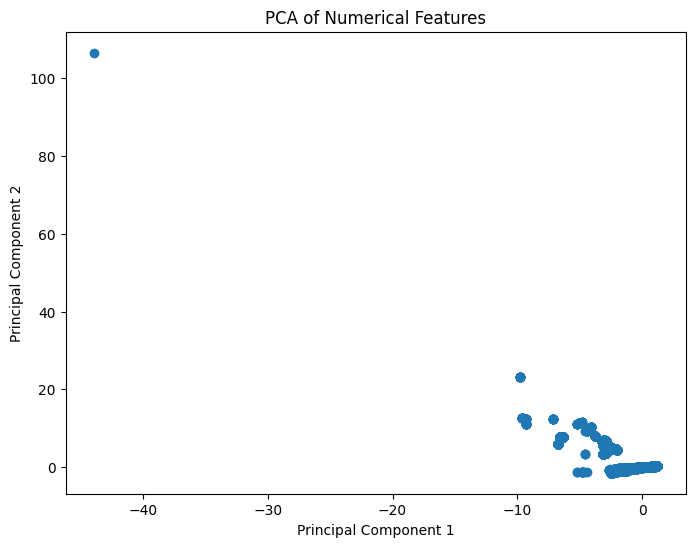

Explained Variance Ratio: [0.5413073 0.305566 ]
Cumulative Explained Variance: [0.5413073 0.8468733]


In [32]:
# Calculate the correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Display the correlation matrix
print(correlation_matrix)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Dimensionality Reduction using PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Select numerical features for PCA (excluding IDs or non-numeric columns)
numerical_features = ['Model Year', 'Electric Range', 'Base MSRP'] # Add other numerical columns here if needed

# Handle missing values in numerical features
df_numerical = df[numerical_features].fillna(df[numerical_features].mean())

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_numerical)

# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 principal components
principal_components = pca.fit_transform(scaled_data)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Visualize the principal components
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Numerical Features')
plt.show()


# Explained Variance Ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

# Cumulative Explained Variance
cumulative_variance = explained_variance_ratio.cumsum()
print("Cumulative Explained Variance:", cumulative_variance)


Heat Map
This image is a heatmap, visually representing a correlation matrix of numerical features related to electric vehicles. The matrix examines the relationships between "Model Year," "Electric Range," and "Base MSRP." Each cell's color represents the correlation coefficient between two features, with a color scale ranging from dark blue for -0.5 to dark red for 1.0. The diagonal cells, where a feature correlates with itself, are always 1.0 and displayed in dark red. Other cells show varying degrees of correlation, indicated by their respective colors and numerical values.
The heatmap reveals a strong negative correlation (-0.53) between "Model Year" and "Electric Range," suggesting that newer models tend to have a longer range. There's a weak positive correlation (0.12) between "Electric Range" and "Base MSRP," implying that longer-range vehicles tend to have slightly higher prices. The correlation between "Model Year" and "Base MSRP" is moderately negative (-0.23), indicating a trend of newer models having potentially lower base prices, though this correlation is weaker than that of model year and range. Overall, the heatmap provides a concise overview of the relationships between these three key features of electric vehicles.


PCA Graph
This is a scatter plot visualizing the results of a Principal Component Analysis (PCA) performed on numerical features, likely related to a dataset of electric vehicles given the context of previous images. The plot displays data points along the first two principal components, labeled "Principal Component 1" and "Principal Component 2." Each point represents an observation (likely an electric vehicle), and its position is determined by its projection onto these two principal components. The plot reveals a concentration of points clustered near the origin (around 0 on both axes), with one point significantly separated and located in the top left corner. This suggests that the first two principal components capture a substantial amount of variance in the original data, and that the outlying point might represent an unusual or unique observation.
The clear separation of the single point from the main cluster suggests it possesses distinct characteristics that differentiate it from the rest. The concentration of the remaining data points indicates similarities among the majority of the observations, implying that the selected numerical features might not vary significantly across most of the dataset. The isolated point could be an outlier in terms of the original variables, or it might represent a specific subgroup with unique attributes. Further investigation would be needed to understand the underlying reasons for this separation and to determine the nature of the variables contributing most to the principal components. Understanding the composition of these principal components, in terms of the original features, is crucial for interpreting this plot and its implications.


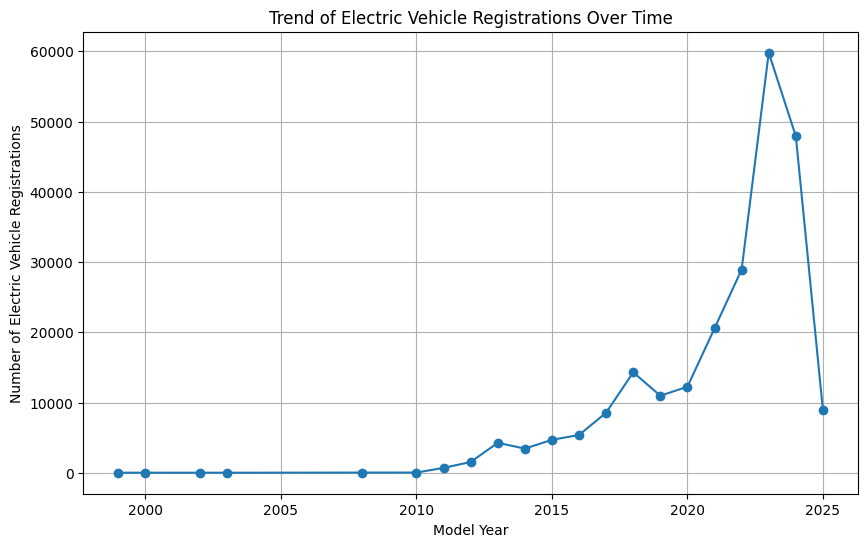

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

Error: 'Vehicle Type' column not found. Please check the dataframe column names.


In [19]:
# Group data by 'Model Year' and count the number of electric vehicles
ev_registration_trend = df.groupby('Model Year')['Electric Vehicle Type'].count()

# Plot the trend
plt.figure(figsize=(10, 6))
plt.plot(ev_registration_trend.index, ev_registration_trend.values, marker='o')
plt.xlabel('Model Year')
plt.ylabel('Number of Electric Vehicle Registrations')
plt.title('Trend of Electric Vehicle Registrations Over Time')
plt.grid(True)
plt.show()


# Group data by 'Model Year' and 'Vehicle Type'
print(df.columns) # print column names for debugging
if 'Vehicle Type' in df.columns:
    vehicle_type_popularity = df.groupby(['Model Year', 'Vehicle Type'])['Vehicle Type'].count().unstack()


    # Plot the trend for each vehicle type
    vehicle_type_popularity.plot(kind='line', figsize=(12, 6), marker='o')
    plt.xlabel('Model Year')
    plt.ylabel('Number of Registrations')
    plt.title('Popularity of Different Vehicle Types Over Time')
    plt.legend(title='Vehicle Type')
    plt.grid(True)
    plt.show()
else:
    print("\nError: 'Vehicle Type' column not found. Please check the dataframe column names.")

This line graph depicts the trend of electric vehicle registrations over time, spanning from 1998 to 2025. The vertical axis represents the number of registrations, ranging from 0 to 60,000, while the horizontal axis indicates the model year. The graph reveals a relatively low number of registrations until around 2012, after which there is a gradual increase. A more significant surge in registrations is observed between 2020 and 2024, culminating in a peak of nearly 60,000 registrations in 2024. However, the graph also projects a sharp decline in registrations by 2025.
The shape of the curve suggests a period of slow adoption of electric vehicles in the early years, followed by a rapid increase in popularity more recently. The sudden drop in projected registrations for 2025 is notable and could be due to various factors, such as changes in government incentives, market saturation, or limitations in the dataset used to generate the graph. The grid lines on the graph facilitate easy reading of values along both axes, and the data points are clearly marked, enhancing the clarity of the trend being presented. The title "Trend of Electric Vehicle Registrations Over Time" succinctly captures the essence of the graph.


In summary, the exploratory data analysis of the electric vehicle registration dataset revealed several key trends. Tesla dominates the market share among car makes, followed by a steep drop in frequency for other manufacturers. Battery Electric Vehicles (BEVs) significantly outnumber Plug-in Hybrid Electric Vehicles (PHEVs) in registrations. King County exhibits a disproportionately high number of electric vehicle registrations compared to other counties, suggesting a concentration of electric vehicles in that area. Analysis of vehicle features showed that newer models tend to have longer electric ranges, while the base MSRP is highly skewed towards lower prices, with a few luxury models at the higher end. Correlation analysis indicated a strong negative relationship between model year and electric range, and a weak positive relationship between range and MSRP. A PCA plot highlighted a potential outlier among the vehicles, suggesting a unique combination of features. Finally, the trend of electric vehicle registrations over time shows a significant increase in recent years, with a projected sharp decline in 2025, the reasons for which warrant further investigation. These findings offer valuable insights into the current landscape of electric vehicle adoption and provide a basis for further analysis and hypothesis generation.